# Case 6: Bayesian Optimal Experimental Design (OED) for model selection

In [1]:
using BOMBs

### Just to print the nice BOMBS logo


In [2]:
printBOMBsLogo()


                      ___________   __________   ___  ___   ___________   __________
                     /  _____   /  / ______  /  /   \/   \  \   _____  \  \  _______\
                    /  /____/  /  / /     / /  /          \  \  \____\  \  \ \________
                   /  _____   /  / /     / /  /            \  \   _____  \  \________ \
                  /  /    /  /  / /     / /  /   /\____/\   \  \  \    \  \          \ \
                 /  /____/  /  / /_____/ /  /   /        \   \  \  \____\  \   _______\ \
                /__________/  /_________/  /__ /          \___\  \__________\  \_________\

                


First we need to generate the models. Note that is section is about model selection, so we need a second model to work with <br>
The first model will be the same as we have been using so far.

#### Important!
In this case you do not need to generate the models separately. Since the utility/cost function also needs to be generated (and requires the experiment specifications) this step will be done later on.

In [3]:
# Generate the empty dictionary with the model_def structure
model_def1 = defModStruct()

# Fill the different elements of the dictionary with your model specifications. See above how ^
model_def1["NameF"] = ["PLacExample"];
model_def1["nStat"] = [4];
model_def1["nPar"] = [9];
model_def1["nInp"] = [1];
model_def1["stName"] = ["Cit_mrna","Cit_foldedP","Cit_fluo","Cit_AU"];

model_def1["inpName"] = ["IPTG"];

model_def1["parName"] = ["alpha1","Vm1","h1","Km1","d1",
                            "alpha2","d2","Kf","sc_molec"];
model_def1["eqns"] = ["dCit_mrna=alpha1+Vm1*(IPTG^h1/(Km1^h1+IPTG^h1))-d1*Cit_mrna",
                    "dCit_foldedP=alpha2*Cit_mrna-(d2+Kf)*Cit_foldedP",
                    "dCit_fluo=Kf*Cit_foldedP-d2*Cit_fluo",
                    "dCit_AU = sc_molec*dCit_fluo"];

model_def1["Y0eqs"] = ["Cit_mrna = (alpha1 + Vm1*(IPTG^h1/(Km1^h1+IPTG^h1)))/d1;",
                      "Cit_foldedP = (alpha2*Cit_mrna)/(Kf+d2);",
                      "Cit_fluo = (Kf*Cit_foldedP)/d2;",
                      "Cit_AU= sc_molec*Cit_fluo;"]; 

model_def1["Y0Sim"] = [];
model_def1["tols"] = [1e-9, 1e-9];

As for the second model, we will use the same model with some minor (and made up with no sense) modifications just for illustration purposes. <br>
    1- Introduction of a second inducer (aTc) <br>
    2- Fix h1 to 2 and alpha1 to 0.5

In [4]:
# Generate the empty dictionary with the model_def structure
model_def2 = defModStruct()

# Fill the different elements of the dictionary with your model specifications. See above how ^
model_def2["NameF"] = ["TestPLac_M2"];
model_def2["nStat"] = [4];
model_def2["nPar"] = [7];
model_def2["nInp"] = [2];
model_def2["stName"] = ["Cit_mrna","Cit_foldedP","Cit_fluo","Cit_AU"];

model_def2["inpName"] = ["aTc", "IPTG"]; # Note that the reference order comes from Model_1 and any aditional inputs get append after it. So even this is coded in this order, in the package it will be used as ["IPTG", "aTc"]
                                         # Hence, when generating the function scripts for this model, the order will also be canged to ["IPTG", "aTc"]
model_def2["parName"] = ["Vm1","Km1","d1",
                            "alpha2","d2","Kf","sc_molec"];

# Same model but h1 is fixed to 2 and alpha1 to 0.5
# Also this model accounts for aTc as inducer, which is not present in model 1. Introduced as produt. This is made up for the example. 

model_def2["eqns"] = ["dCit_mrna=0.5+Vm1*(IPTG^2/(Km1^2+IPTG^2))-d1*Cit_mrna*aTc",
                    "dCit_foldedP=alpha2*Cit_mrna-(d2+Kf)*Cit_foldedP",
                    "dCit_fluo=Kf*Cit_foldedP-d2*Cit_fluo",
                    "dCit_AU = sc_molec*dCit_fluo"];

model_def2["Y0eqs"] = ["Cit_mrna = (0.5 + Vm1*(IPTG^2/(Km1^2+IPTG^2)))/d1*aTc;",
                      "Cit_foldedP = (alpha2*Cit_mrna)/(Kf+d2);",
                      "Cit_fluo = (Kf*Cit_foldedP)/d2;",
                      "Cit_AU= sc_molec*Cit_fluo;"]; 

model_def2["Y0Sim"] = [];
model_def2["tols"] = [1e-9, 1e-9];
model_def2["solver"] = "CVODE_BDF";

### This function gives you information about the structure necessary to generate the model and how to call it. 
If you do not know how to call a specific section, just call the function with no input (infoAll()) to get the information.

In [5]:
infoAll("oedms")



                CALL defODEModelSelectStruct()

oedms_def["Model_1"] = [];
        # Model structure for Model 1. Dict. See Model Generation Section.
        # Note that the order of the inputs is the one defined in this model. If there is a chance that
        # Model_2 has an input that does not exist in this model, these will be appended at the end
        # of the ones in Model_1.

oedms_def["Model_2"] = [];
        # Model structure for Model 2. Dict. See Model Generation Section.

oedms_def["Obs"] = [];
        # States of the model that are observables. This is a vector of strings.These could also be an
        # expression combining states (Only +,-,*,/ and ^ will be considered).

oedms_def["Theta_M1"] = [];
        # Theta vector (frequentist OED or model with 1 parameter) or matrix (Bayesian OED) for model 1.
        # Path to file with samples is also allowed.

oedms_def["Theta_M2"] = [];
        # Theta vector (frequentist OED or model with 2 parameter) or matrix (Bayesia

# OED Model Selection Example 1
This is a basic example showing how to use the basic elements of the section. <br>
<br>
The second inducer aTc (only present in the second model) will be optimised as a fixed input (optimised constant value across the whole experiment). Additionally IPTG will be fixed to 0 only for the first step of the experiment. <br>
<br>
There is no example for this, but if as theta samples for the 2 models you only introduce 1 the script will still proceed using the Euclidean distance. But be careful, since this strategy will not be Bayesian anymore. 

In [6]:
oedms_def = defODEModelSelectStruct()

Dict{Any,Any} with 20 entries:
  "Theta_M2"  => Any[]
  "maxiter"   => Any[]
  "y0_M2"     => Any[]
  "fixedStep" => Any[]
  "preInd_M1" => Any[]
  "fixedInp"  => Any[]
  "Model_1"   => Any[]
  "Obs"       => Any[]
  "uUpper"    => Any[]
  "Model_2"   => Any[]
  "switchT"   => Any[]
  "preInd_M2" => Any[]
  "finalTime" => Any[]
  "y0_M1"     => Any[]
  "equalStep" => Any[]
  "Theta_M1"  => Any[]
  "tsamps"    => Any[]
  "flag"      => Any[]
  "plot"      => Any[]
  "uLower"    => Any[]

In [7]:
oedms_def["Model_1"] = [model_def1]; 
oedms_def["Model_2"] = [model_def2]; 
oedms_def["Obs"] = ["3*Cit_AU"]; 
oedms_def["Theta_M1"] = ["TestThetaPLac.csv"]; 
oedms_def["Theta_M2"] = ["TestThetaPLac2.csv"]; 

oedms_def["y0_M1"] = [10,10,10,10]; 
oedms_def["y0_M2"] = [10,10,10,10];  
oedms_def["preInd_M1"] = [0]; 
oedms_def["preInd_M2"] = [0, 0]; 
oedms_def["finalTime"] = [1439]; 
oedms_def["switchT"] = [[0, 500, 1000, 1439]];
oedms_def["tsamps"] = [collect(0:5:1439)];
oedms_def["fixedInp"] = ["aTc"]; 
oedms_def["fixedStep"] = [(1,[0])]; # This does not take into account fixed inputs
oedms_def["equalStep"] = [];

oedms_def["plot"] = [true]; 
oedms_def["flag"] = ["testOEDMS1"];

oedms_def["uUpper"] = [100, 10];
oedms_def["uLower"] = [0, 0];
oedms_def["maxiter"] = [50];

This is the function that this section uses to generate the 2 model scripts (different from the previous sections) and the necessary scripts for the optimisation. 

In [8]:
# Generate scripts for the ODEs and Utility functions
oedms_def = genOptimMSFuncts(oedms_def);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 1. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 2. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
The amount of inducers is different in the two models.
Be carefull on how you configure that. 
-------------------------------------------------------------

----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\ModelsFunctions\PLacExample_Model.jl
--------------------------------------------------------

#### Now, let's go through the different prints obtained
**- WARNING:** Warning indicating that you have introduced a really low number of samples for theta in Model 1. 50 samples have been set arbitrally, but this number is still way too low. <br>
**- WARNING:** Warning indicating that you have introduced a really low number of samples for theta in Model 2. 50 samples have been set arbitrally, but this number is still way too low. <br>
**- WARNING:** This is just a warning indicating that the number of inducers in the two models is different, so extra care has to be taken when coding things. <br>
**- MODEL GENERATION:** Generation of the scripts for model 1 (same as what GenerateModel does). <br>
**- MODEL GENERATION:** Generation of the scripts for model 2 (same as what GenerateModel does). <br>
**- SCRIPTS OED Model Selection:** Path to the utility function script that has been generated. <br>
**- OPTIMISATION INFO:** Information showing the user how to change the settings of the Bayesian Optimisation package since BOMBS only uses some default settings. Also points to a backup file for how the settings in BOMBS are. 

Here, have a look at how the utility function looks like (to double-check that everything is ok with it).

In [9]:
stream = open(raw"E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_VS_TestPLac_M2_2021-01-11\OEDModelSelectionScripts\PLacExample_VS_TestPLac_M2_OEDMS.jl","r");
Model = read(stream,String);
close(stream);
print(Model)


        

function PLacExample_VS_TestPLac_M2Utility(ins)

    # Definition of the inputs for the ODEs
    IPTG2,aTc1 = ins;
    inputsM1 = [0,IPTG2,0,IPTG2,0,IPTG2];
    inputsM2 = [0,aTc1,IPTG2,0,0,aTc1,IPTG2,0,0,aTc1,IPTG2,0];

    # Solve ODEs

    solM1 = PLacExample_SolveAll(tsMS, pD1MS, spMS, inputsM1, ivss1MS, sampsMS, pre1MS);
    solM2 = TestPLac_M2_SolveAll(tsMS, pD2MS, spMS, inputsM2, ivss2MS, sampsMS, pre2MS);

    # Extracte wanted vectors (observables) with time reduction
    Obs1_M1 = 3 .*solM1[:,4,:]; 

    Obs1_M2 = 3 .*solM2[:,4,:]; 

    
    mu1_M1 = mean(Obs1_M1, dims=2); 

    sd1_M1 = cov(Obs1_M1, dims=2).+(0.1*Matrix((Diagonal(ones(size(Obs1_M1)[1]))))); 


    mu1_M2 = mean(Obs1_M2, dims=2); 

    sd1_M2 = cov(Obs1_M2, dims=2).+(0.1*Matrix((Diagonal(ones(size(Obs1_M2)[1]))))); 


    BHD1 = BhattacharyyaDist(mu1_M1[:,1], mu1_M2[:,1], sd1_M1, sd1_M2); 


    util = mean(BHD1);

        

    return(util)
end

    

And now, to run the optimisation is as simple as: 

In [10]:
oedms_res, oedms_def = mainOEDMS(oedms_def);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 1. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 2. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
The amount of inducers is different in the two models.
Be carefull on how you configure that. 
-------------------------------------------------------------


┌ Info: 2021-01-22T14:42:37.29	iteration: 15	current optimum: 4.246896222266496e11
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:42:40.144	iteration: 16	current optimum: 4.246896222266496e11
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:42:40.194	iteration: 17	current optimum: 4.246896222266496e11
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:42:40.244	iteration: 18	current optimum: 4.246896222266496e11
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:42:40.291	iteration: 19	current optimum: 4.246896222266496e11
└ @ BayesianOptimization C:\Users\dav


----------------------------------------- RESULTS -----------------------------------------
OED for Model Selection results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_VS_TestPLac_M2_2021-01-22
Under the name OEDModelSelectResults_testOEDMS1.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_VS_TestPLac_M2_2021-01-22
Under the names PlotOEDMSResults_Exp1_testOEDMS1.png and Plot_OEDMSConvergence_testOEDMS1.png
--------------------------------------------------------------------------------------



### First, let's have a look at the results structure

In [11]:
oedms_res

Dict{Any,Any} with 9 entries:
  "BestResOptim" => (observed_optimum = 1.85686e12, observed_optimizer = [59.95…
  "uInpOpt"      => Dict{Any,Any}("aTc"=>[0.246753],"IPTG"=>Any[0, 59.9541, 98.…
  "ResOptim"     => Dict{String,Any}("modelY"=>[1.24247e10, 8.97982e9, 5.01717e…
  "Simul_M1"     => [0.317361 18.8312 11.9507 823.01; 0.317361 18.8312 11.9507 …
  "Simul_M2"     => [0.0 0.0 0.0 0.0; 2.3932 15.5592 0.465218 32.0381; … ; 53.5…
  "BestUtil"     => 1.85686e12
  "ConvCurv"     => [1.0 1.24247e10; 2.0 1.24247e10; … ; 49.0 1.85686e12; 50.0 …
  "SimulObs_M2"  => [0.0; 96.1144; … ; 416645.0; 416645.0]…
  "SimulObs_M1"  => [2469.03; 2469.03; … ; 50344.0; 50344.0]…

**- BestResOptim:** BayesianOptimisation optimisation results (as they come from the package) for the best iteration

In [12]:
oedms_res["BestResOptim"]

(observed_optimum = 1.8568580477129045e12, observed_optimizer = [59.954101208649355, 98.04623197865885, 0.2467529177493104], model_optimum = 5.714054887290359e10, model_optimizer = [40.27391072282452, 16.589456951101084, 7.520583128887289])

**- uInpOpt:** Dictionary with an entry for each inducer of the models and the optimised value for each step (if an input is fixed for the whole experiment this will appear only once). <br>
If you have steps fixed to a specific value, this will still be included in this results (it will be the actual values for the experiments, not the optimisation results).

In [13]:
oedms_res["uInpOpt"]

Dict{Any,Any} with 2 entries:
  "aTc"  => [0.246753]
  "IPTG" => Any[0, 59.9541, 98.0462]

**- ResOptim:** The optimisation structure details from Bayesian Optimisation.

In [14]:
oedms_res["ResOptim"]

Dict{String,Any} with 12 entries:
  "modelY"             => [1.24247e10, 8.97982e9, 5.01717e10, 2.17998e10, 8.673…
  "modelX"             => [68.75 93.75 … 5.06857 50.5204; 81.25 6.25 … 66.6399 …
  "acquisitionoptions" => (method = :LD_LBFGS, restarts = 10, maxeval = 2000)
  "duration"           => DurationCounter(1.61133e9, Inf, 1.61133e9, Inf)
  "repetitions"        => 1
  "model_optimum"      => 5.71405e10
  "sense"              => Max
  "modeloptimizer"     => MAPGPOptimizer{NamedTuple{(:domean, :kern, :noise, :l…
  "model_optimizer"    => [40.2739, 16.5895, 7.52058]
  "upperbounds"        => [100.0, 100.0, 10.0]
  "observed_optimizer" => [59.9541, 98.0462, 0.246753]
  "observed_optimum"   => 1.85686e12

**- Simul_M1:** Simulation of model 1 using the optimum input profile. 

In [15]:
oedms_res["Simul_M1"]

288×4×3 Array{Float64,3}:
[:, :, 1] =
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 ⋮                             
 6.47106   383.972   243.677   16781.3
 6.47106   383.972   243.677   16781.3
 6.47106   383.972   243.677   16781.3
 6.47106   383.972   243.677   16781.3
 6.47106   383.972   243.677   16781.3
 6.47106   383.972   243.677   16781.3
 6.47106   383.972   243.677   16781.3
 6.47106   383.972   243.677   16781.3
 6.47106   383.972   243.677   16781.3
 6.47106   383.972   243.677   16781.3
 6.47106   383.972  

**- Simul_M2:** Simulation of model 2 using the optimum input profile. 

In [16]:
oedms_res["Simul_M2"]

288×4×3 Array{Float64,3}:
[:, :, 1] =
  0.0         0.0        0.0            0.0
  2.3932     15.5592     0.465218      32.0381
  4.58487    56.1104     3.32138      228.734
  6.59198   114.078     10.0181       689.919
  8.43008   183.662     21.2529      1463.62
 10.1134    260.453     37.2034      2562.09
 11.655     341.125     57.7005      3973.66
 13.0667    423.2       82.3548      5671.53
 14.3596    504.855    110.649       7620.08
 15.5436    584.774    142.004       9779.41
 16.6279    662.034    175.824      12108.5
 17.6209    736.014    211.529      14567.3
 18.5303    806.317    248.572      17118.4
  ⋮                                
 53.5544   3177.74    2016.65      138881.0
 53.5544   3177.74    2016.65      138881.0
 53.5544   3177.74    2016.66      138881.0
 53.5544   3177.74    2016.66      138881.0
 53.5544   3177.74    2016.66      138881.0
 53.5544   3177.74    2016.66      138881.0
 53.5544   3177.74    2016.66      138881.0
 53.5544   3177.74    2016.66    

**- BestUtil:** Best utility function value

In [17]:
oedms_res["BestUtil"]

1.8568580477129045e12

**- ConvCurv:** Convergence curve for the optimisation. First column indicates iteration and second column best utility function so far. 

In [18]:
oedms_res["ConvCurv"]

50×2 Array{Float64,2}:
  1.0  1.24247e10
  2.0  1.24247e10
  3.0  5.01717e10
  4.0  5.01717e10
  5.0  5.01717e10
  6.0  4.2469e11
  7.0  4.2469e11
  8.0  4.2469e11
  9.0  4.2469e11
 10.0  4.2469e11
 11.0  4.2469e11
 12.0  4.2469e11
 13.0  4.2469e11
  ⋮    
 39.0  1.85686e12
 40.0  1.85686e12
 41.0  1.85686e12
 42.0  1.85686e12
 43.0  1.85686e12
 44.0  1.85686e12
 45.0  1.85686e12
 46.0  1.85686e12
 47.0  1.85686e12
 48.0  1.85686e12
 49.0  1.85686e12
 50.0  1.85686e12

**- SimulObs_M2:** Simulation of the observables for model 2 using the optimum input profile. 

In [19]:
oedms_res["SimulObs_M2"]

288×1×3 Array{Float64,3}:
[:, :, 1] =
      0.0
     96.11440586661519
    686.2005358459977
   2069.7561935895146
   4390.869729031015
   7686.263988883186
  11920.975796114202
  17014.581812978075
  22860.22910281453
  29338.218360105617
  36325.48877668236
  43702.043285820226
  51355.11009325506
      ⋮
 416642.25676905713
 416642.6358747746
 416642.9835015974
 416643.30225625273
 416643.5944990432
 416643.86243478855
 416644.10805592895
 416644.3332162582
 416644.5396101035
 416644.7287852197
 416644.9021819028
 416645.0610987039

[:, :, 2] =
      0.0
     82.87947798173977
    595.0269219091621
   1804.5596830376458
   3848.652780583903
   6772.038706970321
  10556.063511346272
  15140.420004377094
  20439.225222397494
  26352.749995378304
  32775.82360928766
  39603.71278584974
  46736.09628056589
      ⋮
 406911.4797265365
 406911.9206278595
 406912.3267785462
 406912.70089846395
 406913.04547785135
 406913.3628383073
 406913.6551012166
 406913.9242423059
 406914.1720735408
 4

**- SimulObs_M1:** Simulation of the observables for model 1 using the optimum input profile. 

In [20]:
oedms_res["SimulObs_M1"]

288×1×3 Array{Float64,3}:
[:, :, 1] =
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
     ⋮
 50343.93485509303
 50343.94101625819
 50343.9463609918
 50343.95099533875
 50343.955012537524
 50343.958495484025
 50343.961516777796
 50343.964137823765
 50343.966409902896
 50343.96837892494
 50343.97008585623
 50343.971566635446

[:, :, 2] =
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
     ⋮
 47748.69416493422
 47748.70451471857
 47748.713556215764
 47748.721453868326
 47748.72835011931
 47748.7343722149
 47748.739632481316
 47748.744228226686
 

### Now, let's have a look at the plots generated
First, the convergence curve <br>
Note that to reduce the computational time of the example we used a really low number of iterations, so do not be surprised if the results do not look good. Also, technically, the second model does not make much sense as well. 

In [21]:
using Images # Package not called in BOMBS, this is just to display the generated PNGs

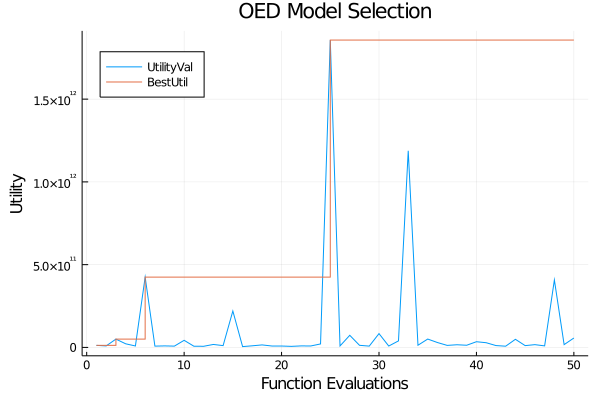

In [22]:
# Note that none of the curves are at convergence due to the low time allowed for the optimisation. 
CC1 = load(string(oedms_def["savepath"], "\\Plot_OEDMSConvergence_",oedms_def["flag"],".png"))

And now the experiment simulations

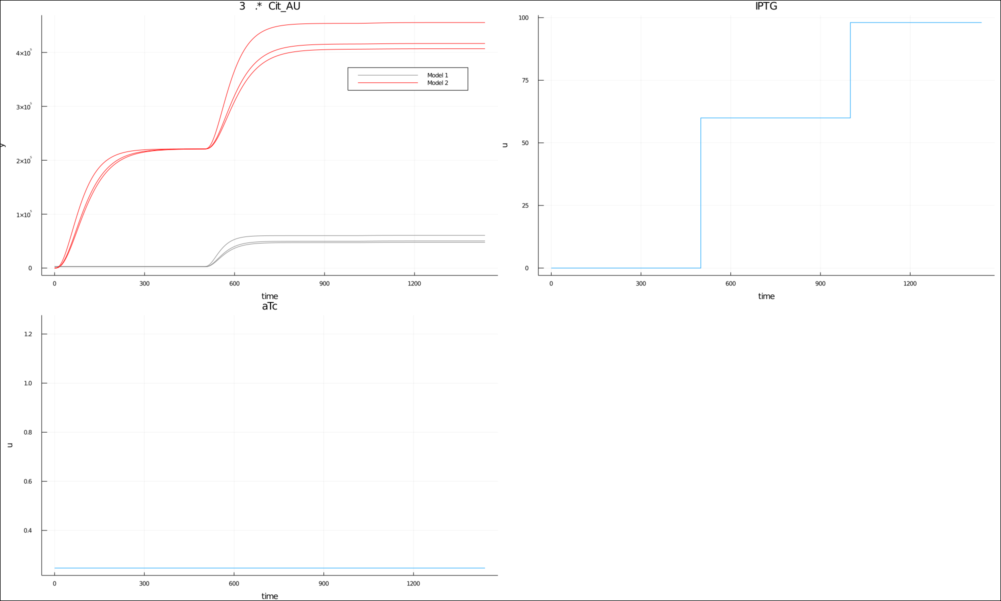

In [23]:
expMS = load(string(oedms_def["savepath"], "\\PlotOEDMSResults_Exp1_",oedms_def["flag"],".png"))

# OED Model Selection Example 2
This is a basic example showing how to use the basic elements of the section. <br>
<br>
Here we are going to design a pulse experiment with only 2 optimised input values. <br>
<br>
There is no example for this, but if as theta samples for the 2 models you only introduce 1 the script will still proceed using the Euclidean distance. But be careful, since this strategy will not be Bayesian anymore. 

In [24]:
oedms_def2 = defODEModelSelectStruct()

Dict{Any,Any} with 20 entries:
  "Theta_M2"  => Any[]
  "maxiter"   => Any[]
  "y0_M2"     => Any[]
  "fixedStep" => Any[]
  "preInd_M1" => Any[]
  "fixedInp"  => Any[]
  "Model_1"   => Any[]
  "Obs"       => Any[]
  "uUpper"    => Any[]
  "Model_2"   => Any[]
  "switchT"   => Any[]
  "preInd_M2" => Any[]
  "finalTime" => Any[]
  "y0_M1"     => Any[]
  "equalStep" => Any[]
  "Theta_M1"  => Any[]
  "tsamps"    => Any[]
  "flag"      => Any[]
  "plot"      => Any[]
  "uLower"    => Any[]

In [25]:
oedms_def2["Model_1"] = [model_def1]; 
oedms_def2["Model_2"] = [model_def2]; 
oedms_def2["Obs"] = ["3*Cit_AU"]; 
oedms_def2["Theta_M1"] = ["TestThetaPLac.csv"]; 
oedms_def2["Theta_M2"] = ["TestThetaPLac2.csv"]; 

oedms_def2["y0_M1"] = [10,10,10,10]; 
oedms_def2["y0_M2"] = [10,10,10,10];  
oedms_def2["preInd_M1"] = [0]; 
oedms_def2["preInd_M2"] = [0, 0]; 
oedms_def2["finalTime"] = [1439]; 
oedms_def2["switchT"] = [[0, 250, 500, 750, 1000, 1200, 1439]];
oedms_def2["tsamps"] = [collect(0:5:1439)];
oedms_def2["fixedInp"] = []; 
oedms_def2["fixedStep"] = []; # This does not take into account fixed inputs
oedms_def2["equalStep"] = [[2,4,6],[1,3,5]];

oedms_def2["plot"] = [true]; 
oedms_def2["flag"] = ["testOEDMS2"];

oedms_def2["uUpper"] = [100, 10];
oedms_def2["uLower"] = [0, 0];
oedms_def2["maxiter"] = [50];

In [26]:
# Generate scripts for the ODEs and Utility functions
oedms_def2 = genOptimMSFuncts(oedms_def2);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 1. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 2. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
The amount of inducers is different in the two models.
Be carefull on how you configure that. 
-------------------------------------------------------------

----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\ModelsFunctions\PLacExample_Model.jl
--------------------------------------------------------

In [27]:
oedms_res2, oedms_def2 = mainOEDMS(oedms_def2);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 1. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 2. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
The amount of inducers is different in the two models.
Be carefull on how you configure that. 
-------------------------------------------------------------


┌ Info: 2021-01-22T14:43:22.617	iteration: 20	current optimum: 8.72570332232662e11
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:43:24.436	iteration: 21	current optimum: 8.72570332232662e11
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:43:24.793	iteration: 22	current optimum: 8.72570332232662e11
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:43:24.853	iteration: 23	current optimum: 8.72570332232662e11
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:43:24.9	iteration: 24	current optimum: 8.72570332232662e11
└ @ BayesianOptimization C:\Users\david\.ju


----------------------------------------- RESULTS -----------------------------------------
OED for Model Selection results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_VS_TestPLac_M2_2021-01-22
Under the name OEDModelSelectResults_testOEDMS2.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_VS_TestPLac_M2_2021-01-22
Under the names PlotOEDMSResults_Exp1_testOEDMS2.png and Plot_OEDMSConvergence_testOEDMS2.png
--------------------------------------------------------------------------------------



We know what the results structure looks like, so let's go for the plots.

### Now, let's have a look at the plots generated
First, the convergence curve <br>
Note that to reduce the computational time of the example we used a really low number of iterations, so do not be surprised if the results do not look good. Also, technically, the second model does not make much sense as well. 

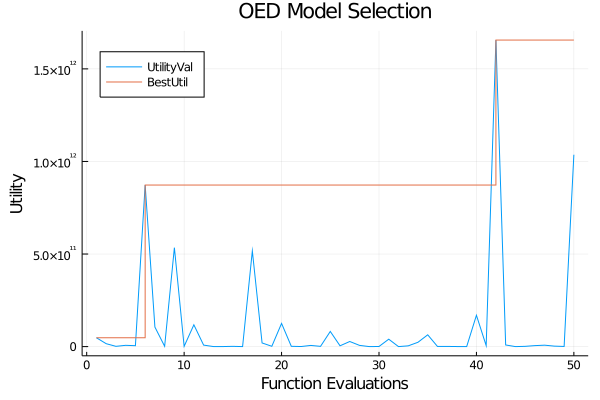

In [28]:
# Note that none of the curves are at convergence due to the low time allowed for the optimisation. 
CC2 = load(string(oedms_def2["savepath"], "\\Plot_OEDMSConvergence_",oedms_def2["flag"],".png"))

And now the experiment simulations

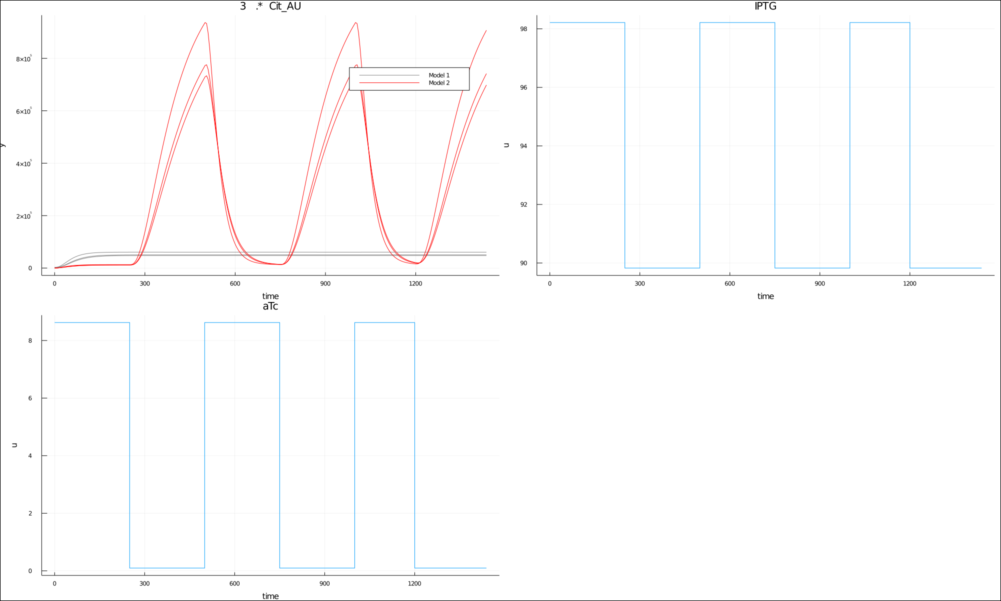

In [29]:
expMS2 = load(string(oedms_def2["savepath"], "\\PlotOEDMSResults_Exp1_",oedms_def2["flag"],".png"))

# OED Model Selection Example 3
This is a basic example showing how to use the basic elements of the section. <br>
<br>
Here we are going to design a pulse experiment with only 2 optimised input values (one for each inducer). In this case when one inducer is up, the other is 0. <br>
<br>
There is no example for this, but if as theta samples for the 2 models you only introduce 1 the script will still proceed using the Euclidean distance. But be careful, since this strategy will not be Bayesian anymore. 

In [30]:
oedms_def3 = defODEModelSelectStruct();

In [31]:
oedms_def3["Model_1"] = [model_def1]; 
oedms_def3["Model_2"] = [model_def2]; 
oedms_def3["Obs"] = ["3*Cit_AU"]; 
oedms_def3["Theta_M1"] = ["TestThetaPLac.csv"]; 
oedms_def3["Theta_M2"] = ["TestThetaPLac2.csv"]; 

oedms_def3["y0_M1"] = [10,10,10,10]; 
oedms_def3["y0_M2"] = [10,10,10,10];  
oedms_def3["preInd_M1"] = [0]; 
oedms_def3["preInd_M2"] = [0, 0]; 
oedms_def3["finalTime"] = [1439]; 
oedms_def3["switchT"] = [[0, 250, 500, 750, 1000, 1200, 1439]];
oedms_def3["tsamps"] = [collect(0:5:1439)];
oedms_def3["fixedInp"] = []; 
oedms_def3["fixedStep"] = [(1,[0, Any]), (2,[Any, 0]), (3,[0, Any]), (4,[Any, 0]), (5,[0, Any]), (6,[Any, 0])]; # This does not take into account fixed inputs
oedms_def3["equalStep"] = [[1,3,5],[2,4,6]];

oedms_def3["plot"] = [true]; 
oedms_def3["flag"] = ["testOEDMS3"];

oedms_def3["uUpper"] = [100, 10];
oedms_def3["uLower"] = [0, 0];
oedms_def3["maxiter"] = [50];

In [32]:
# Generate scripts for the ODEs and Utility functions
oedms_def3 = genOptimMSFuncts(oedms_def3);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 1. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 2. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
The amount of inducers is different in the two models.
Be carefull on how you configure that. 
-------------------------------------------------------------

----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\ModelsFunctions\PLacExample_Model.jl
--------------------------------------------------------

In [33]:
oedms_res3, oedms_def3 = mainOEDMS(oedms_def3);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 1. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for Model 2. 
Consider using more samples for better results. 
-------------------------------------------------------------
-------------------------- WARNING --------------------------
The amount of inducers is different in the two models.
Be carefull on how you configure that. 
-------------------------------------------------------------


┌ Info: 2021-01-22T14:43:34.694	iteration: 10	current optimum: 1.6238283561826168e13
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:43:36.653	iteration: 11	current optimum: 1.6238283561826168e13
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:43:36.728	iteration: 12	current optimum: 1.6238283561826168e13
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:43:36.806	iteration: 13	current optimum: 1.6238283561826168e13
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:43:36.882	iteration: 14	current optimum: 1.6238283561826168e13
└ @ BayesianOptimization C:\Use

┌ Info: 2021-01-22T14:43:39.62	iteration: 49	current optimum: 1.6238283561826168e13
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140



----------------------------------------- RESULTS -----------------------------------------
OED for Model Selection results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_VS_TestPLac_M2_2021-01-22
Under the name OEDModelSelectResults_testOEDMS3.jld
--------------------------------------------------------------------------------------


┌ Info:  ──────────────────────────────────────────────────────────────────────────────
│                                        Time                   Allocations      
│                                ──────────────────────   ───────────────────────
│        Tot / % measured:            9.02s / 98.6%           1.50GiB / 100%     
│ 
│  Section               ncalls     time   %tot     avg     alloc   %tot      avg
│  ──────────────────────────────────────────────────────────────────────────────
│  function evaluation       50    5.48s  61.6%   110ms   0.96GiB  64.2%  19.7MiB
│  acquisition               41    3.38s  37.9%  82.3ms    545MiB  35.4%  13.3MiB
│  model update              41   31.5ms  0.35%   769μs   5.03MiB  0.33%   126KiB
│  model hyperparamet...     41   7.05ms  0.08%   172μs    284KiB  0.02%  6.93KiB
│  ──────────────────────────────────────────────────────────────────────────────
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOpti



----------------------------------------- PLOTS -----------------------------------------
PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_VS_TestPLac_M2_2021-01-22
Under the names PlotOEDMSResults_Exp1_testOEDMS3.png and Plot_OEDMSConvergence_testOEDMS3.png
--------------------------------------------------------------------------------------



We know what the results structure looks like, so let's go for the plots.

### Now, let's have a look at the plots generated
First, the convergence curve <br>
Note that to reduce the computational time of the example we used a really low number of iterations, so do not be surprised if the results do not look good. Also, technically, the second model does not make much sense as well. 

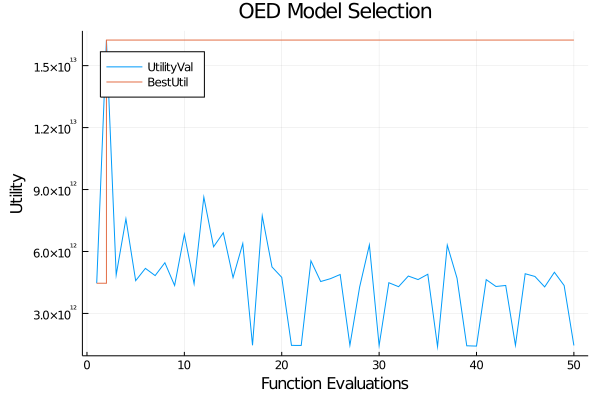

In [34]:
# Note that none of the curves are at convergence due to the low time allowed for the optimisation. 
CC3 = load(string(oedms_def3["savepath"], "\\Plot_OEDMSConvergence_",oedms_def3["flag"],".png"))

And now the experiment simulations

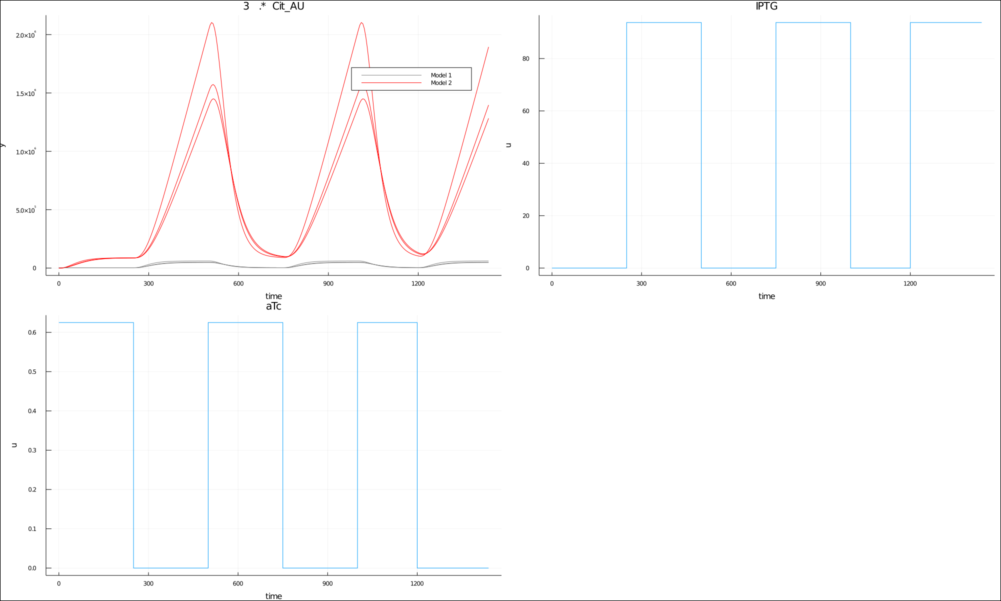

In [35]:
expMS3 = load(string(oedms_def3["savepath"], "\\PlotOEDMSResults_Exp1_",oedms_def3["flag"],".png"))

### This is the end of the section. Look at the cool logo to check the package version ;) 


In [36]:
versionBOMBS()


                                                  *
                                    **           * *           *                          **
                                   * *          *   *         * *                       **  *
                                  *  *         *    *        *  **                    **     *
                         *       *   *  *   ***     *     ***    **                 **        *      *
                        * *     *    * * * *         **  *         **      *      **           *    * *   ***
                       *   *   *     **   *            **            **   * * ****              ****   ***   ***
                   ** *     ***                                        * *   *                                  *
                  *  *                                                  *                                        *
                 *            ___________   __________   ___  ___   ___________   __________                  